In [1]:
import requests
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from bs4 import BeautifulSoup
import seaborn as sns

In [2]:
def add_value_labels(ax, spacing=5):
    # Função adaptada do Stak Oveflow no link: https://stackoverflow.com/questions/28931224/how-to-add-value-labels-on-a-bar-chart
    # Esta função adiciona os value labels acima da barra no gráfico abaixo

    """Add labels to the end of each bar in a bar chart.

    Arguments:
        ax (matplotlib.axes.Axes): The matplotlib object containing the axes
            of the plot to annotate.
        spacing (int): The distance between the labels and the bars.
    """

    # For each bar: Place a label
    for rect in ax.patches:
        # Get X and Y placement of label from rect.
        y_value = rect.get_height()
        x_value = rect.get_x() + rect.get_width() / 2

        # Number of points between bar and label. Change to your liking.
        space = spacing
        # Vertical alignment for positive values
        va = 'bottom'

        # If value of bar is negative: Place label below bar
        if y_value < 0:
            # Invert space to place label below
            space *= -1
            # Vertically align label at top
            va = 'top'

        # Use Y value as label and format number with one decimal place
        label = "{:.2f}".format(y_value)

        # Create annotation
        ax.annotate(
            label,                      # Use `label` as label
            (x_value, y_value),         # Place label at end of the bar
            xytext=(0, space),          # Vertically shift label by `space`
            textcoords="offset points", # Interpret `xytext` as offset in points
            ha='center',                # Horizontally center label
            va=va)                      # Vertically align label differently for
                                        # positive and negative values.
            
            
def get_rate(df, season):
    return BreakingBad.loc[(df.Season==season) & (df.EpisodeNumber==SeasonLength[season]), 'Rate'].values[0]

In [3]:
link = 'https://www.imdb.com/title/tt0944947/episodes?season='
season_n = [str(idx) for idx in range(1, 9)]
season_n

['1', '2', '3', '4', '5', '6', '7', '8']

In [4]:
url = [link + idx for idx in season_n]
url

['https://www.imdb.com/title/tt0944947/episodes?season=1',
 'https://www.imdb.com/title/tt0944947/episodes?season=2',
 'https://www.imdb.com/title/tt0944947/episodes?season=3',
 'https://www.imdb.com/title/tt0944947/episodes?season=4',
 'https://www.imdb.com/title/tt0944947/episodes?season=5',
 'https://www.imdb.com/title/tt0944947/episodes?season=6',
 'https://www.imdb.com/title/tt0944947/episodes?season=7',
 'https://www.imdb.com/title/tt0944947/episodes?season=8']

# Copy

In [5]:
SeasonLength = {1: 10, 2: 10, 3: 10, 4: 10, 5: 10, 6: 10, 7: 7, 8: 6}

In [6]:
%%time
season_dict = {}
get_off = ['', '0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '0', 'Rate', 'Error: please try again.']

for sea, page in enumerate(url):
    search = requests.get(page)
    soup = BeautifulSoup(search.content, 'html.parser')
    results = soup.find(id='episodes_content')
    releases = results.find_all('div', class_='info')
    cleaned_releases = []
    
    for idx, release in enumerate(releases):
        release_text = release.text.strip().split('\n')
        for element in release_text:
            cleaned_element = ' '.join(element.strip().split())
            if cleaned_element not in get_off:
                cleaned_releases.append(cleaned_element)
                
    season = np.array_split(cleaned_releases, SeasonLength[sea + 1])          
    season_dict[sea + 1] = season

Wall time: 12.5 s


In [7]:
season

[array(['14 Apr. 2019', 'Winterfell', '7.6', '(134,926)',
        'Jon and Daenerys arrive in Winterfell and are met with skepticism. Sam learns about the fate of his family. Cersei gives Euron the reward he aims for. Theon follows his heart.'],
       dtype='<U175'),
 array(['21 Apr. 2019', 'A Knight of the Seven Kingdoms', '7.9',
        '(133,543)',
        'Jaime faces judgment and Winterfell prepares for the battle to come.'],
       dtype='<U175'),
 array(['28 Apr. 2019', 'The Long Night', '7.5', '(219,998)',
        'The Night King and his army have arrived at Winterfell and the great battle begins.'],
       dtype='<U175'),
 array(['5 May 2019', 'The Last of the Starks', '5.5', '(167,909)',
        'The Battle of Winterfell is over and a new chapter for Westeros begins.'],
       dtype='<U175'),
 array(['12 May 2019', 'The Bells', '6.0', '(195,935)',
        "Forces have arrived at King's Landing for the final battle."],
       dtype='<U175'),
 array(['19 May 2019', 'The Iron T

In [8]:
dataframes = {}
for key in season_dict.keys():
    df = pd.DataFrame(season_dict[key], columns=['ReleaseDate', 'EpisodeName', 'Rate', 'Votes', 'EpisodeDescription'])
    df['EpisodeNumber'] = np.arange(1, SeasonLength[key] + 1)
    df['Season'] = key
    dataframes[key] = df

In [9]:
dataframes

{1:     ReleaseDate                            EpisodeName Rate     Votes  \
 0    8 May 2011                       Winter Is Coming  8.9  (51,554)   
 1   15 May 2011                          The Kingsroad  8.6  (38,959)   
 2    1 May 2011                              Lord Snow  8.5  (36,859)   
 3    8 May 2011  Cripples, Bastards, and Broken Things  8.6  (35,060)   
 4   15 May 2011                  The Wolf and the Lion  9.0  (36,452)   
 5   22 May 2011                         A Golden Crown  9.1  (36,038)   
 6   29 May 2011                     You Win or You Die  9.1  (36,554)   
 7   5 Jun. 2011                         The Pointy End  8.9  (34,212)   
 8  12 Jun. 2011                                 Baelor  9.6  (47,817)   
 9  19 Jun. 2011                         Fire and Blood  9.4  (41,976)   
 
                                   EpisodeDescription  EpisodeNumber  Season  
 0  Eddard Stark is torn between his family and an...              1       1  
 1  While Bran recovers

In [10]:
# Concatenate the dataframes into a single dataframe
concatenated_df = pd.concat(dataframes.values(), ignore_index=True)

# Reset the index of the concatenated dataframe
concatenated_df.reset_index(drop=True, inplace=True)

# Print the concatenated dataframe
concatenated_df

,ReleaseDate,EpisodeName,Rate,Votes,EpisodeDescription,EpisodeNumber,Season
0,8 May 2011,Winter Is Coming,8.9,"(51,554)",Eddard Stark is torn between his family and an...,1,1
1,15 May 2011,The Kingsroad,8.6,"(38,959)","While Bran recovers from his fall, Ned takes o...",2,1
2,1 May 2011,Lord Snow,8.5,"(36,859)",Jon begins his training with the Night's Watch...,3,1
3,8 May 2011,"Cripples, Bastards, and Broken Things",8.6,"(35,060)",Eddard investigates Jon Arryn's murder. Jon be...,4,1
4,15 May 2011,The Wolf and the Lion,9.0,"(36,452)",Catelyn has captured Tyrion and plans to bring...,5,1
...,...,...,...,...,...,...,...
68,21 Apr. 2019,A Knight of the Seven Kingdoms,7.9,"(133,543)",Jaime faces judgment and Winterfell prepares f...,2,8
69,28 Apr. 2019,The Long Night,7.5,"(219,998)",The Night King and his army have arrived at Wi...,3,8
70,5 May 2019,The Last of the Starks,5.5,"(167,909)",The Battle of Winterfell is over and a new cha...,4,8
71,12 May 2019,The Bells,6.0,"(195,935)",Forces have arrived at King's Landing for the ...,5,8


In [11]:
BreakingBad = concatenated_df.sort_values(by=['Season', 'EpisodeNumber'])

In [12]:
BreakingBad.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 73 entries, 0 to 72
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   ReleaseDate         73 non-null     object
 1   EpisodeName         73 non-null     object
 2   Rate                73 non-null     object
 3   Votes               73 non-null     object
 4   EpisodeDescription  73 non-null     object
 5   EpisodeNumber       73 non-null     int32 
 6   Season              73 non-null     int64 
dtypes: int32(1), int64(1), object(5)
memory usage: 4.3+ KB


In [13]:
BreakingBad['Rate'] = BreakingBad['Rate'].apply(lambda x: float(x))
BreakingBad['Votes'] = BreakingBad['Votes'].apply(lambda x: int(x[1:-1].replace(',', '')))

In [14]:
BreakingBad

,ReleaseDate,EpisodeName,Rate,Votes,EpisodeDescription,EpisodeNumber,Season
0,8 May 2011,Winter Is Coming,8.9,51554,Eddard Stark is torn between his family and an...,1,1
1,15 May 2011,The Kingsroad,8.6,38959,"While Bran recovers from his fall, Ned takes o...",2,1
2,1 May 2011,Lord Snow,8.5,36859,Jon begins his training with the Night's Watch...,3,1
3,8 May 2011,"Cripples, Bastards, and Broken Things",8.6,35060,Eddard investigates Jon Arryn's murder. Jon be...,4,1
4,15 May 2011,The Wolf and the Lion,9.0,36452,Catelyn has captured Tyrion and plans to bring...,5,1
...,...,...,...,...,...,...,...
68,21 Apr. 2019,A Knight of the Seven Kingdoms,7.9,133543,Jaime faces judgment and Winterfell prepares f...,2,8
69,28 Apr. 2019,The Long Night,7.5,219998,The Night King and his army have arrived at Wi...,3,8
70,5 May 2019,The Last of the Starks,5.5,167909,The Battle of Winterfell is over and a new cha...,4,8
71,12 May 2019,The Bells,6.0,195935,Forces have arrived at King's Landing for the ...,5,8


In [15]:
BreakingBad.sort_values(by=['Rate', 'Votes'], ascending=False)[0:10]

,ReleaseDate,EpisodeName,Rate,Votes,EpisodeDescription,EpisodeNumber,Season
58,19 Jun. 2016,Battle of the Bastards,9.9,216704,Jon and Sansa face Ramsay Bolton on the fields...,9,6
59,26 Jun. 2016,The Winds of Winter,9.9,153939,Cersei and Loras Tyrell stand trial by the god...,10,6
28,2 Jun. 2013,The Rains of Castamere,9.9,111467,Robb and Catelyn arrive at the Twins for the w...,9,3
47,31 May 2015,Hardhome,9.8,104297,Tyrion advises Daenerys. Sansa forces Theon to...,8,5
63,6 Aug. 2017,The Spoils of War,9.7,91211,Daenerys takes matters into her own hands. Ary...,4,7
54,22 May 2016,The Door,9.7,74704,Sansa and Jon make plans. Arya is given anothe...,5,6
31,13 Apr. 2014,The Lion and the Rose,9.7,57372,Joffrey and Margaery's wedding has come. Tyrio...,2,4
37,1 Jun. 2014,The Mountain and the Viper,9.7,57206,Theon helps Ramsay seize Moat Cailin. The wild...,8,4
35,11 May 2014,The Laws of Gods and Men,9.7,55256,Tyrion's trial has come. Yara and her troops s...,6,4
18,27 May 2012,Blackwater,9.7,51285,Stannis Baratheon's fleet and army arrive at K...,9,2


In [16]:
BreakingBad.sort_values(by='Votes', ascending=False)[0:10]

,ReleaseDate,EpisodeName,Rate,Votes,EpisodeDescription,EpisodeNumber,Season
72,19 May 2019,The Iron Throne,4.0,254527,In the aftermath of the devastating attack on ...,6,8
69,28 Apr. 2019,The Long Night,7.5,219998,The Night King and his army have arrived at Wi...,3,8
58,19 Jun. 2016,Battle of the Bastards,9.9,216704,Jon and Sansa face Ramsay Bolton on the fields...,9,6
71,12 May 2019,The Bells,6.0,195935,Forces have arrived at King's Landing for the ...,5,8
70,5 May 2019,The Last of the Starks,5.5,167909,The Battle of Winterfell is over and a new cha...,4,8
59,26 Jun. 2016,The Winds of Winter,9.9,153939,Cersei and Loras Tyrell stand trial by the god...,10,6
67,14 Apr. 2019,Winterfell,7.6,134926,Jon and Daenerys arrive in Winterfell and are ...,1,8
68,21 Apr. 2019,A Knight of the Seven Kingdoms,7.9,133543,Jaime faces judgment and Winterfell prepares f...,2,8
28,2 Jun. 2013,The Rains of Castamere,9.9,111467,Robb and Catelyn arrive at the Twins for the w...,9,3
47,31 May 2015,Hardhome,9.8,104297,Tyrion advises Daenerys. Sansa forces Theon to...,8,5


In [17]:
BreakingBad.sort_values(by='Rate', ascending=False)[0:10]['EpisodeDescription'].values

array(["Robb and Catelyn arrive at the Twins for the wedding. Jon is put to the test to see where his loyalties truly lie. Bran's group decides to split up. Daenerys plans an invasion of Yunkai.",
       'Cersei and Loras Tyrell stand trial by the gods. Daenerys prepares to set sail for Westeros. Davos confronts Melisandre. Sam and Gilly arrive in the Citadel. Bran discovers a long-kept secret. Lord Frey has an uninvited guest.',
       'Jon and Sansa face Ramsay Bolton on the fields of Winterfell. Daenerys strikes back at her enemies. Theon and Yara arrive in Meereen.',
       'Tyrion advises Daenerys. Sansa forces Theon to tell her a secret. Cersei remains stubborn. Arya meets her first target. Jon and Tormund meet with the wildling elders.',
       "Theon helps Ramsay seize Moat Cailin. The wildlings attack Mole's Town. Sansa comes up with a story to protect Lord Baelish. Daenerys finds out a secret about Jorah Mormont. Oberyn Martell faces Gregor Clegane, the Mountain.",
       'Da

In [18]:
aggs_by_cols = {'Rate': [np.min, np.max, np.ptp, np.mean, np.median],
                'Votes': [np.min, np.max, np.sum, np.mean, np.median]}

BreakingBadGroupby = BreakingBad.groupby('Season').agg(aggs_by_cols)

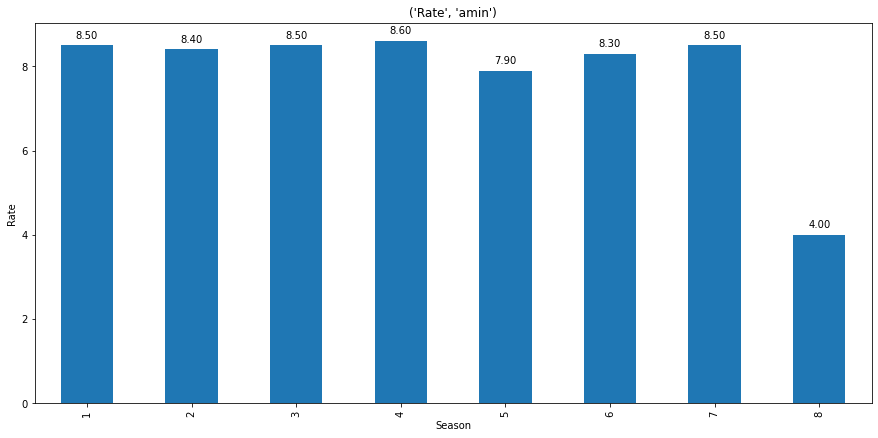

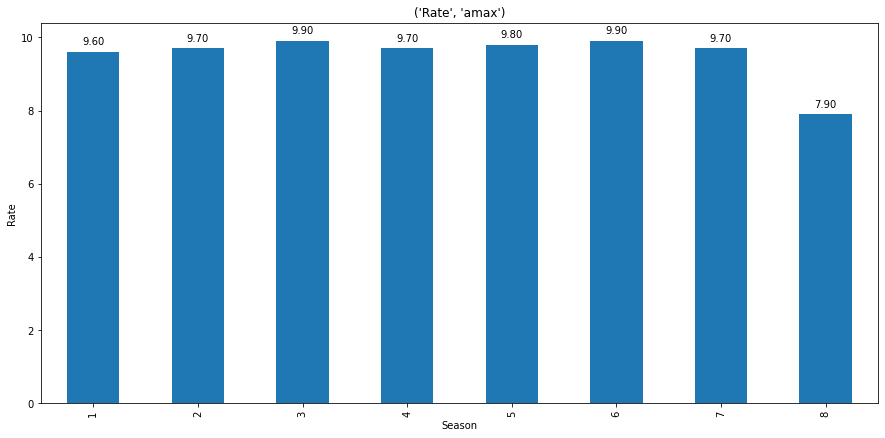

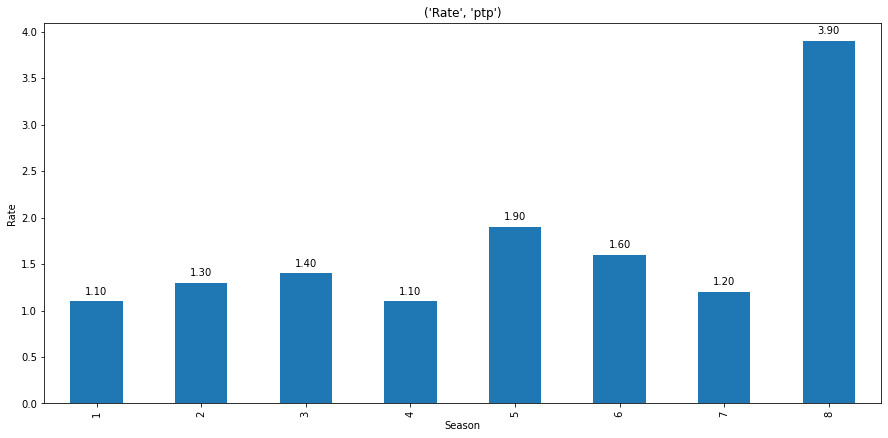

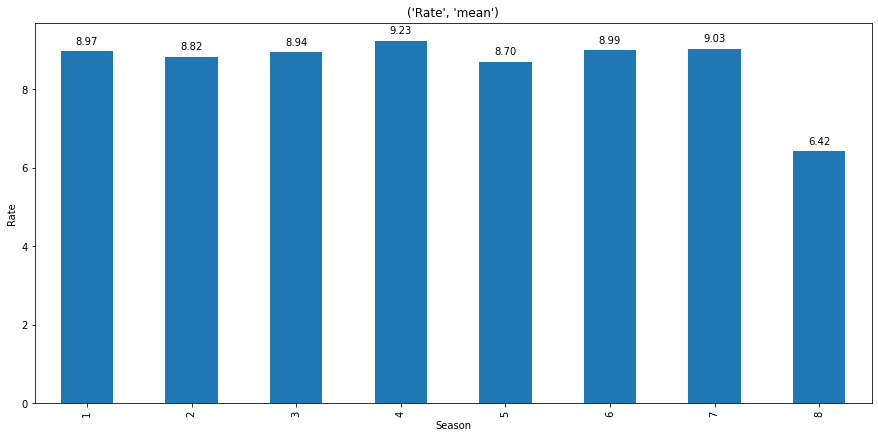

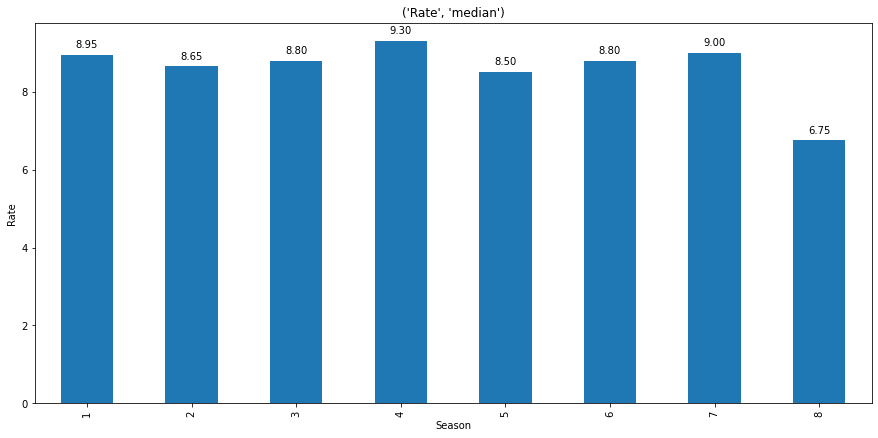

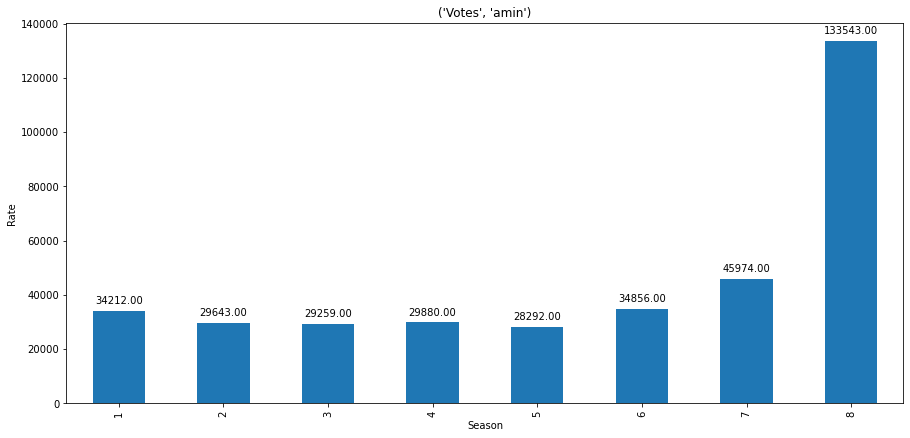

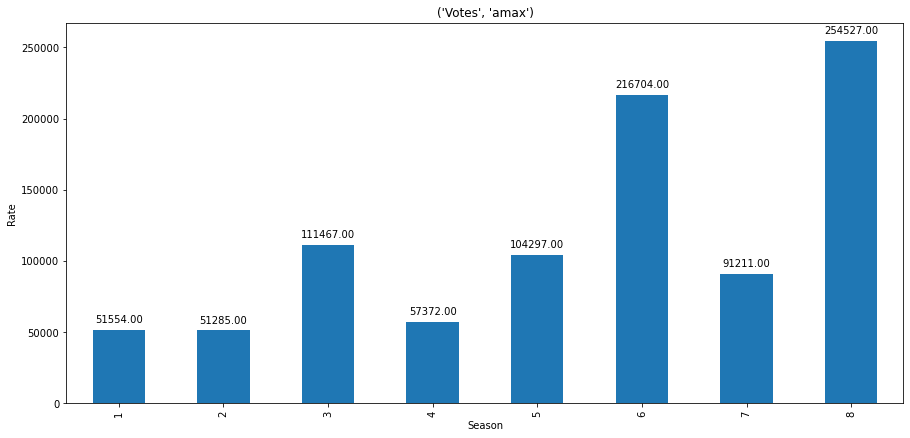

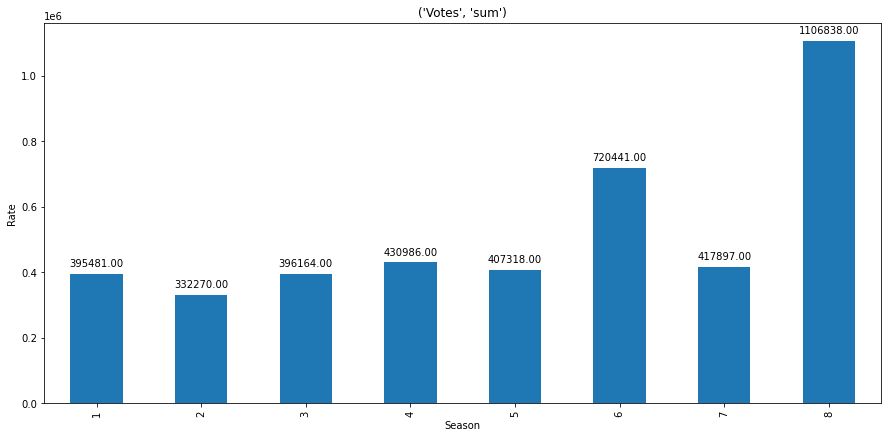

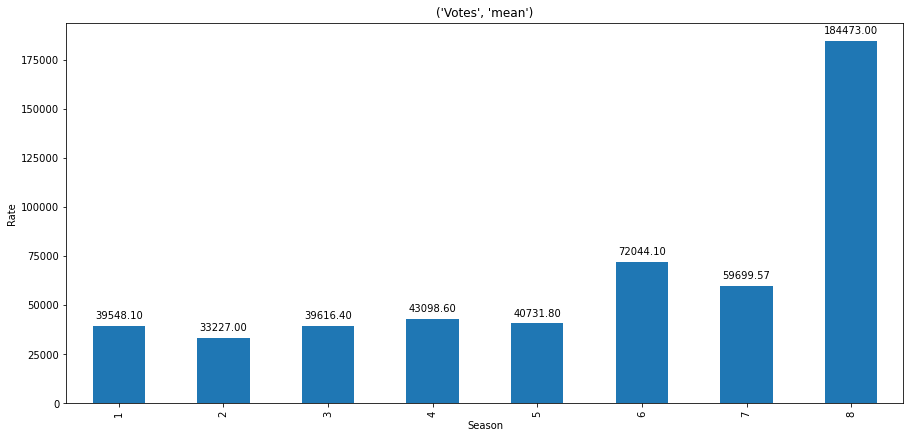

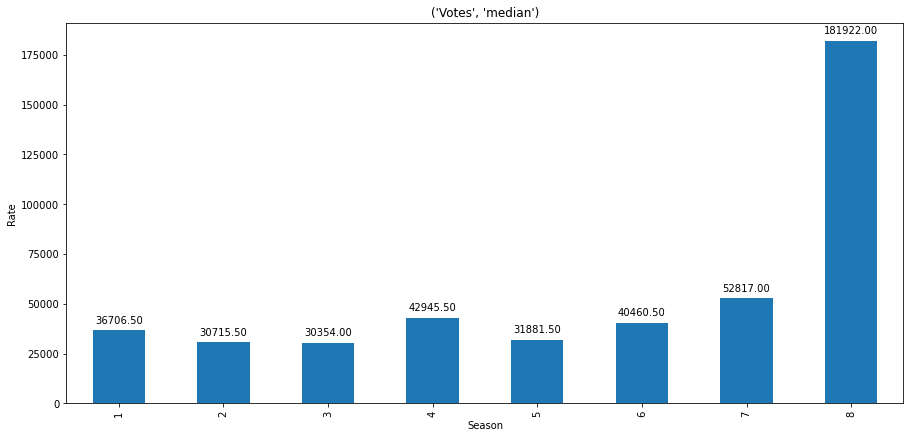

In [19]:
for item in BreakingBadGroupby.columns:
    fig, ax = plt.subplots(figsize=(15, 7))
    BreakingBadGroupby[item].plot(kind='bar')
    ax.set_title(item)
    ax.set_ylabel('Rate')
    ax.set_xlabel('Season')
    add_value_labels(ax)

In [20]:
SeasonFinale = {}
for season in BreakingBad.Season.unique():
    SeasonFinale[season] = get_rate(BreakingBad, season)

In [21]:
SeasonFinale

{1: 9.4, 2: 9.3, 3: 9.1, 4: 9.6, 5: 9.1, 6: 9.9, 7: 9.4, 8: 4.0}

([<matplotlib.axis.XTick at 0x2432300b280>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

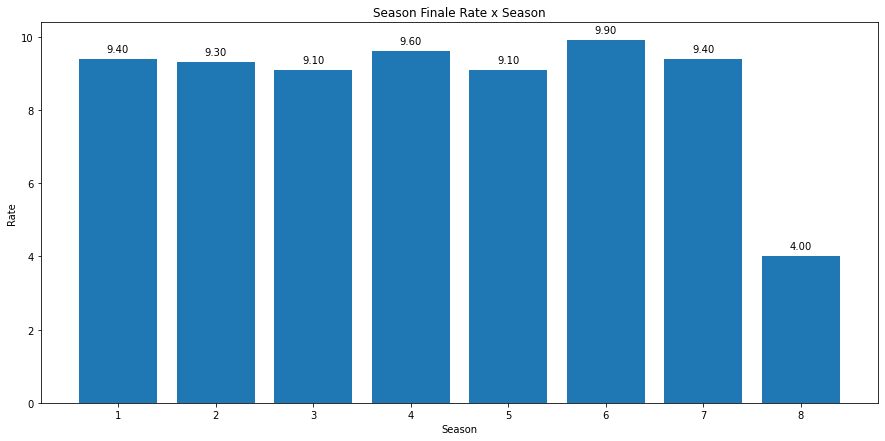

In [22]:
fig, ax = plt.subplots(figsize=(15,7))
plt.bar(SeasonFinale.keys(), SeasonFinale.values())
add_value_labels(ax)
plt.title('Season Finale Rate x Season')
plt.xlabel('Season')
plt.ylabel('Rate')
plt.xticks(list(SeasonFinale.keys()))